In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline


In [38]:
playerdata_1718season = '.\playerstatsbygame_20172018_regularseason.csv'
playerseason_data = '.\Seasons_Stats.csv'
salarydata = './nba_salaries_1990_to_2018.csv'
rpm_data = './RPM_data.xlsx'

In [39]:
playerstats_1718 = pd.read_csv(playerdata_1718season)
playerseasondata = pd.read_csv(playerseason_data)
salarydata = pd.read_csv(salarydata)
rpmdata = pd.read_excel(rpm_data, sheet_name='Agg')

In [27]:
print(salarydata.columns)
print(playerseasondata.columns)
playerseasondata.head()

Index(['player', 'salary', 'season_end', 'season_start', 'team', 'team_name'], dtype='object')
Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [57]:
# combine salary data (1990 - 2017 season end) with stats for one giant player table
# Note, each year is the season end year

stats = playerseasondata.loc[playerseasondata.loc[:, 'Year'] >= 1990, :]
data = stats.merge(salarydata, left_on=['Player', 'Year'], right_on = ['player', 'season_end'], how='outer')

#get rid of columns I don't want/duplicates and rename existing for clarity

data.drop(['Unnamed: 0','3PAr', 'blank2',
 'blanl', 'BPM', 'DBPM', 'eFG%', 'FTr', 'OBPM', 'team_name', 'VORP', 'WS/48'], axis=1, inplace=True)

data.rename(columns={ '2PA':'2PAttempt', '2P':'2PMade', '2P%':'2Pt%', '3P%':'3Pt%',
 '3PA':'3PtAttempt', '3P':'3PtMade', 'Age':'Age_seasonEnd', 'AST%':'Assist%',
 'AST':'Assists', 'BLK%':'Block%', 'BLK':'Blocks', 'DRB%':'Drebound%',
 'DRB':'Drebounds', 'DWS': 'Dwinshares', 'FG%':'FG%', 'FGA':'Fgattempt', 'FG':'Fgmade',
 'FT%':'FT%', 'FTA':'FTAttempt', 'FT':'FTMade', 'G':'Games',
 'GS':'GamesStarted', 'MP':'MinPlayed', 'ORB':'Offrb', 'ORB%':'OffRb%',
 'OWS': 'OffWinShares', 'PER':'PER', 'PF':'PersonalFouls', 'Player':'Player', 'player':'player',
 'Pos':'Position', 'PTS':'Pts', 'salary':'Salary', 'season_end':'Season_End',
 'season_start':'Season_Start', 'STL%':'Steal%', 'STL':'Steals',
 'team':'Team', 'Tm': 'Stats_Team', 'TRB%':'TotalRbnd%', 'TRB':'TotalRbnds',
 'TS%':'TS%', 'TOV':'Turnover', 'TOV%':'Turnover%','USG%':'Usg%', 'WS':'WinShares', 'Year': 'Stats_SeasonEnd'}, inplace=True)

In [58]:
data.groupby('Team').count()

team_list = data['Team'].unique()
team_list


array([nan, 'POR', 'DEN', 'ORL', 'DET', 'WAS', 'DAL', 'PHI', 'SAS', 'CHI',
       'MIA', 'CLE', 'UTA', 'LAC', 'OKC', 'ATL', 'NJN', 'CHA', 'MIN',
       'MIL', 'BOS', 'HOU', 'SAC', 'LAL', 'PHO', 'NYK', 'IND', 'GSW',
       'MEM', 'TOR', 'NOH'], dtype=object)

Basic EDA

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with salary

In [59]:
print("Shape:", data.shape, '\n')
print("Types:", data.dtypes, '\n')
print("Null counts:", data.isnull().sum(), '\n')

Shape: (17387, 47) 

Types: Stats_SeasonEnd     object
Player              object
Position            object
Age_seasonEnd      float64
Stats_Team          object
Games              float64
GamesStarted       float64
MinPlayed          float64
PER                float64
TS%                float64
OffRb%             float64
Drebound%          float64
TotalRbnd%         float64
Assist%            float64
Steal%             float64
Block%             float64
Turnover%          float64
Usg%               float64
OffWinShares       float64
Dwinshares         float64
WinShares          float64
Fgmade             float64
Fgattempt          float64
FG%                float64
3PtMade            float64
3PtAttempt         float64
3Pt%               float64
2PMade             float64
2PAttempt          float64
2Pt%               float64
FTMade             float64
FTAttempt          float64
FT%                float64
Offrb              float64
Drebounds          float64
TotalRbnds         float64


In [60]:
data.describe()

,Age_seasonEnd,Games,GamesStarted,MinPlayed,PER,TS%,OffRb%,Drebound%,TotalRbnd%,Assist%,...,TotalRbnds,Assists,Steals,Blocks,Turnover,PersonalFouls,Pts,Salary,Season_End,Season_Start
count,15738.000000,15738.000000,15738.000000,15738.000000,15732.000000,15659.000000,15732.000000,15732.000000,15732.000000,15732.000000,...,15738.000000,15738.000000,15738.000000,15738.000000,15738.000000,15738.00000,15738.000000,1.446300e+04,14463.000000,14463.000000
mean,27.007244,47.445292,22.437286,1103.761723,12.302161,0.502111,5.974491,13.905975,9.942112,13.014569,...,191.759245,101.649765,35.906532,22.472487,65.622315,99.61342,450.726331,3.305678e+06,2005.607343,2004.607343
std,4.150771,26.699580,28.013355,914.473617,6.367223,0.098888,5.079551,6.616391,5.102778,9.734938,...,195.272720,130.925823,35.826763,34.321103,62.656263,76.94238,459.940800,4.232002e+06,8.069335,8.069335
min,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.706000e+03,1991.000000,1990.000000
25%,24.000000,23.000000,0.000000,268.000000,9.500000,0.470000,2.300000,9.200000,6.000000,6.100000,...,40.000000,14.000000,7.000000,2.000000,14.000000,30.00000,79.000000,7.115170e+05,1999.000000,1998.000000
50%,26.000000,51.000000,7.000000,893.000000,12.600000,0.515000,4.800000,12.900000,9.000000,10.200000,...,132.500000,53.000000,25.000000,10.000000,48.000000,89.00000,299.000000,1.650000e+06,2006.000000,2005.000000
75%,30.000000,73.000000,41.000000,1799.750000,15.500000,0.551000,8.900000,18.100000,13.400000,17.900000,...,279.000000,138.000000,54.000000,27.000000,100.000000,157.00000,693.000000,4.047380e+06,2013.000000,2012.000000
max,44.000000,85.000000,83.000000,3533.000000,129.100000,1.136000,100.000000,100.000000,100.000000,100.000000,...,1530.000000,1164.000000,246.000000,376.000000,464.000000,371.00000,2832.000000,3.468255e+07,2018.000000,2017.000000


In [61]:
for col in data.columns:
    print(col, data.loc[:, col].nunique())

Stats_SeasonEnd 28
Player 2292
Position 16
Age_seasonEnd 27
Stats_Team 39
Games 85
GamesStarted 84
MinPlayed 3140
PER 512
TS% 570
OffRb% 291
Drebound% 392
TotalRbnd% 304
Assist% 507
Steal% 107
Block% 127
Turnover% 388
Usg% 394
OffWinShares 167
Dwinshares 87
WinShares 197
Fgmade 799
Fgattempt 1515
FG% 468
3PtMade 240
3PtAttempt 552
3Pt% 398
2PMade 738
2PAttempt 1333
2Pt% 458
FTMade 568
FTAttempt 696
FT% 626
Offrb 350
Drebounds 700
TotalRbnds 939
Assists 711
Steals 217
Blocks 256
Turnover 322
PersonalFouls 331
Pts 1844
player 2230
Salary 5466
Season_End 28
Season_Start 28
Team 30


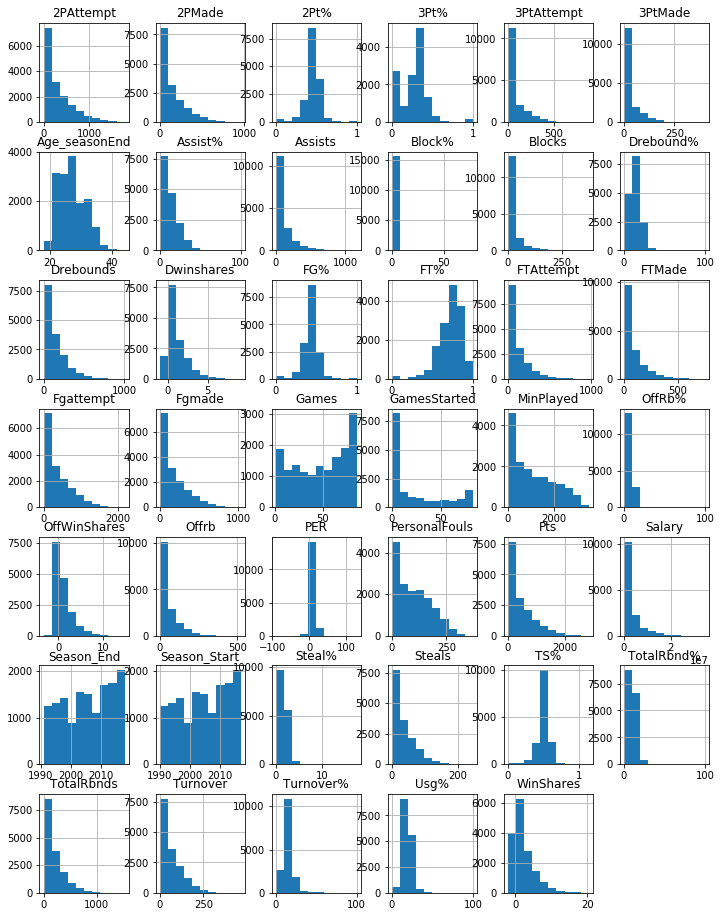

In [44]:
data.hist(figsize=(12,16));

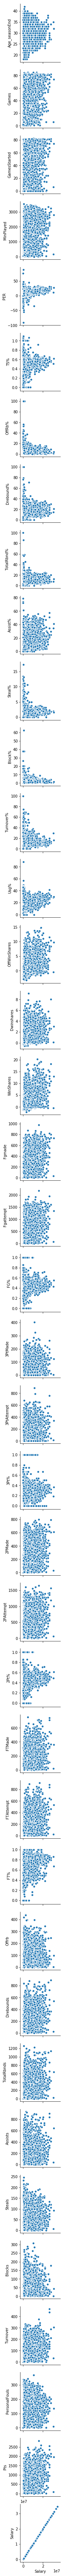

In [49]:
list(data.columns)

stats_features = [ 'Age_seasonEnd', 'Games', 'GamesStarted',
 'MinPlayed', 'PER', 'TS%', 'OffRb%', 'Drebound%', 'TotalRbnd%', 'Assist%',
 'Steal%', 'Block%', 'Turnover%', 'Usg%', 'OffWinShares', 'Dwinshares', 'WinShares',
 'Fgmade', 'Fgattempt', 'FG%', '3PtMade', '3PtAttempt', '3Pt%', '2PMade', '2PAttempt',
 '2Pt%', 'FTMade', 'FTAttempt', 'FT%', 'Offrb', 'Drebounds', 'TotalRbnds', 'Assists',
 'Steals', 'Blocks', 'Turnover', 'PersonalFouls', 'Pts', 'Salary']

g=sns.pairplot(data,
              y_vars = stats_features ,
              x_vars = 'Salary');

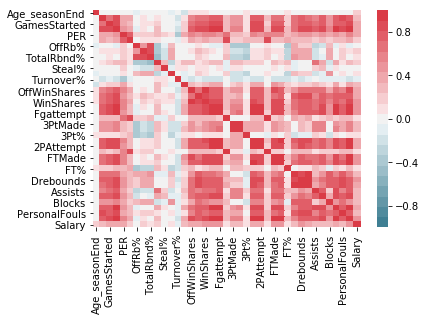

In [50]:
sns.heatmap(data.loc[:, stats_features].corr(),
            vmin = -1,
           vmax = 1,
           cmap = sns.diverging_palette(220,10,n=21));

Cleaning it up -- checking for missing values...

In [51]:
data.isnull().sum()
#Lots of missing values.

Stats_SeasonEnd    1649
Player             1649
Position           1649
Age_seasonEnd      1649
Games              1649
GamesStarted       1649
MinPlayed          1649
PER                1655
TS%                1728
OffRb%             1655
Drebound%          1655
TotalRbnd%         1655
Assist%            1655
Steal%             1655
Block%             1655
Turnover%          1712
Usg%               1655
OffWinShares       1649
Dwinshares         1649
WinShares          1649
Fgmade             1649
Fgattempt          1649
FG%                1737
3PtMade            1649
3PtAttempt         1649
3Pt%               4450
2PMade             1649
2PAttempt          1649
2Pt%               1772
FTMade             1649
FTAttempt          1649
FT%                2376
Offrb              1649
Drebounds          1649
TotalRbnds         1649
Assists            1649
Steals             1649
Blocks             1649
Turnover           1649
PersonalFouls      1649
Pts                1649
player          

In [83]:
#For NaN stats values, a '0' is an acceptable number, so will fill in missing stats with 0.

data[['Games',
 'GamesStarted',
 'MinPlayed',
 'PER',
 'TS%',
 'OffRb%',
 'Drebound%',
 'TotalRbnd%',
 'Assist%',
 'Steal%',
 'Block%',
 'Turnover%',
 'Usg%',
 'WinShares',
 'Fgmade',
 'Fgattempt',
 'FG%',
 '3PtMade',
 '3PtAttempt',
 '3Pt%',
 '2PMade',
 '2PAttempt',
 '2Pt%',
 'FTMade',
 'FTAttempt',
 'FT%',
 'Offrb',
 'Drebounds',
 'TotalRbnds',
 'Assists',
 'Steals',
 'Blocks',
 'Turnover',
 'PersonalFouls',
 'Pts']] = data[['Games',
 'GamesStarted',
 'MinPlayed',
 'PER',
 'TS%',
 'OffRb%',
 'Drebound%',
 'TotalRbnd%',
 'Assist%',
 'Steal%',
 'Block%',
 'Turnover%',
 'Usg%',
 'WinShares',
 'Fgmade',
 'Fgattempt',
 'FG%',
 '3PtMade',
 '3PtAttempt',
 '3Pt%',
 '2PMade',
 '2PAttempt',
 '2Pt%',
 'FTMade',
 'FTAttempt',
 'FT%',
 'Offrb',
 'Drebounds',
 'TotalRbnds',
 'Assists',
 'Steals',
 'Blocks',
 'Turnover',
 'PersonalFouls',
 'Pts']].fillna(value=0)

# Count # of salaries per year that are non-null:
data.loc[:, ['Stats_SeasonEnd', 'Salary']].groupby('Stats_SeasonEnd').count()

,Salary
Stats_SeasonEnd,
1990.0,0
1991.0,357
1992.0,372
1993.0,363
1994.0,410
1995.0,327
1996.0,447
1997.0,458
1998.0,426


In [86]:
# For NaN in the remaining columns, that indicates that there wasn't a match when I joined the stats-by-season table 
# with the salary data. For now, will impute any missing values as the average of the player's following year salary
# THIS ISN'T WORKING.....

players = data['Player'].unique()

for year in range(1990, 2017):
    for player in players:
        if data.loc[(data.loc[:, 'Stats_SeasonEnd'] == year) & (data.loc[:, 'Player'] == player), 'Salary'].isnull() is True:
            data.loc[(data.loc[:, 'Stats_SeasonEnd'] == year) & (data.loc[:, 'Player'] == player), 'Salary'] = (
                data.loc[(data.loc[:, 'Stats_SeasonEnd'] == (year+1)) & (data.loc[:, 'Player'] == player), 'Salary'] )
    
data.loc[:, ['Stats_SeasonEnd', 'Salary']].groupby('Stats_SeasonEnd').count()

,Salary
Stats_SeasonEnd,
1990.0,0
1991.0,357
1992.0,372
1993.0,363
1994.0,410
1995.0,327
1996.0,447
1997.0,458
1998.0,426


In [120]:
#more trying to make this work...

data.loc[(data.loc[:, 'Player'] == 'A.C. Green') & (data.loc[:, 'Stats_SeasonEnd'] == (1990+1)), 'Salary']
for year in range(1990, 1995):
    if data.loc[(data.loc[:, 'Stats_SeasonEnd'] == year) & (data.loc[:, 'Player'] == 'A.C. Green'), 'Salary'].isnull().sum() == 1:
        print(data.loc[(data.loc[:, 'Stats_SeasonEnd'] == year) & (data.loc[:, 'Player'] == 'A.C. Green'), 'Salary'])
        data.loc[(data.loc[:, 'Stats_SeasonEnd'] == year) & (data.loc[:, 'Player'] == 'A.C. Green'), 'Salary'] = (
            data.loc[(data.loc[:, 'Stats_SeasonEnd'] == (year+1)) & (data.loc[:, 'Player'] == 'A.C. Green'), 'Salary'] )

#data.loc[(data.loc[:, 'Player'] == 'A.C. Green'), :]
#data.loc[(data.loc[:, 'Stats_SeasonEnd'] == 1990) & (data.loc[:, 'Player'] == 'A.C. Green'), 'Salary']

data.loc[(data.loc[:, 'Stats_SeasonEnd'] == (1990)) & (data.loc[:, 'Player'] == 'A.C. Green'), 'Salary'].fillna(
    value=data.loc[(data.loc[:, 'Stats_SeasonEnd'] == (1991)) & (data.loc[:, 'Player'] == 'A.C. Green'), 'Salary'])

141   NaN
Name: Salary, dtype: float64


141   NaN
Name: Salary, dtype: float64

Team Salary Analysis

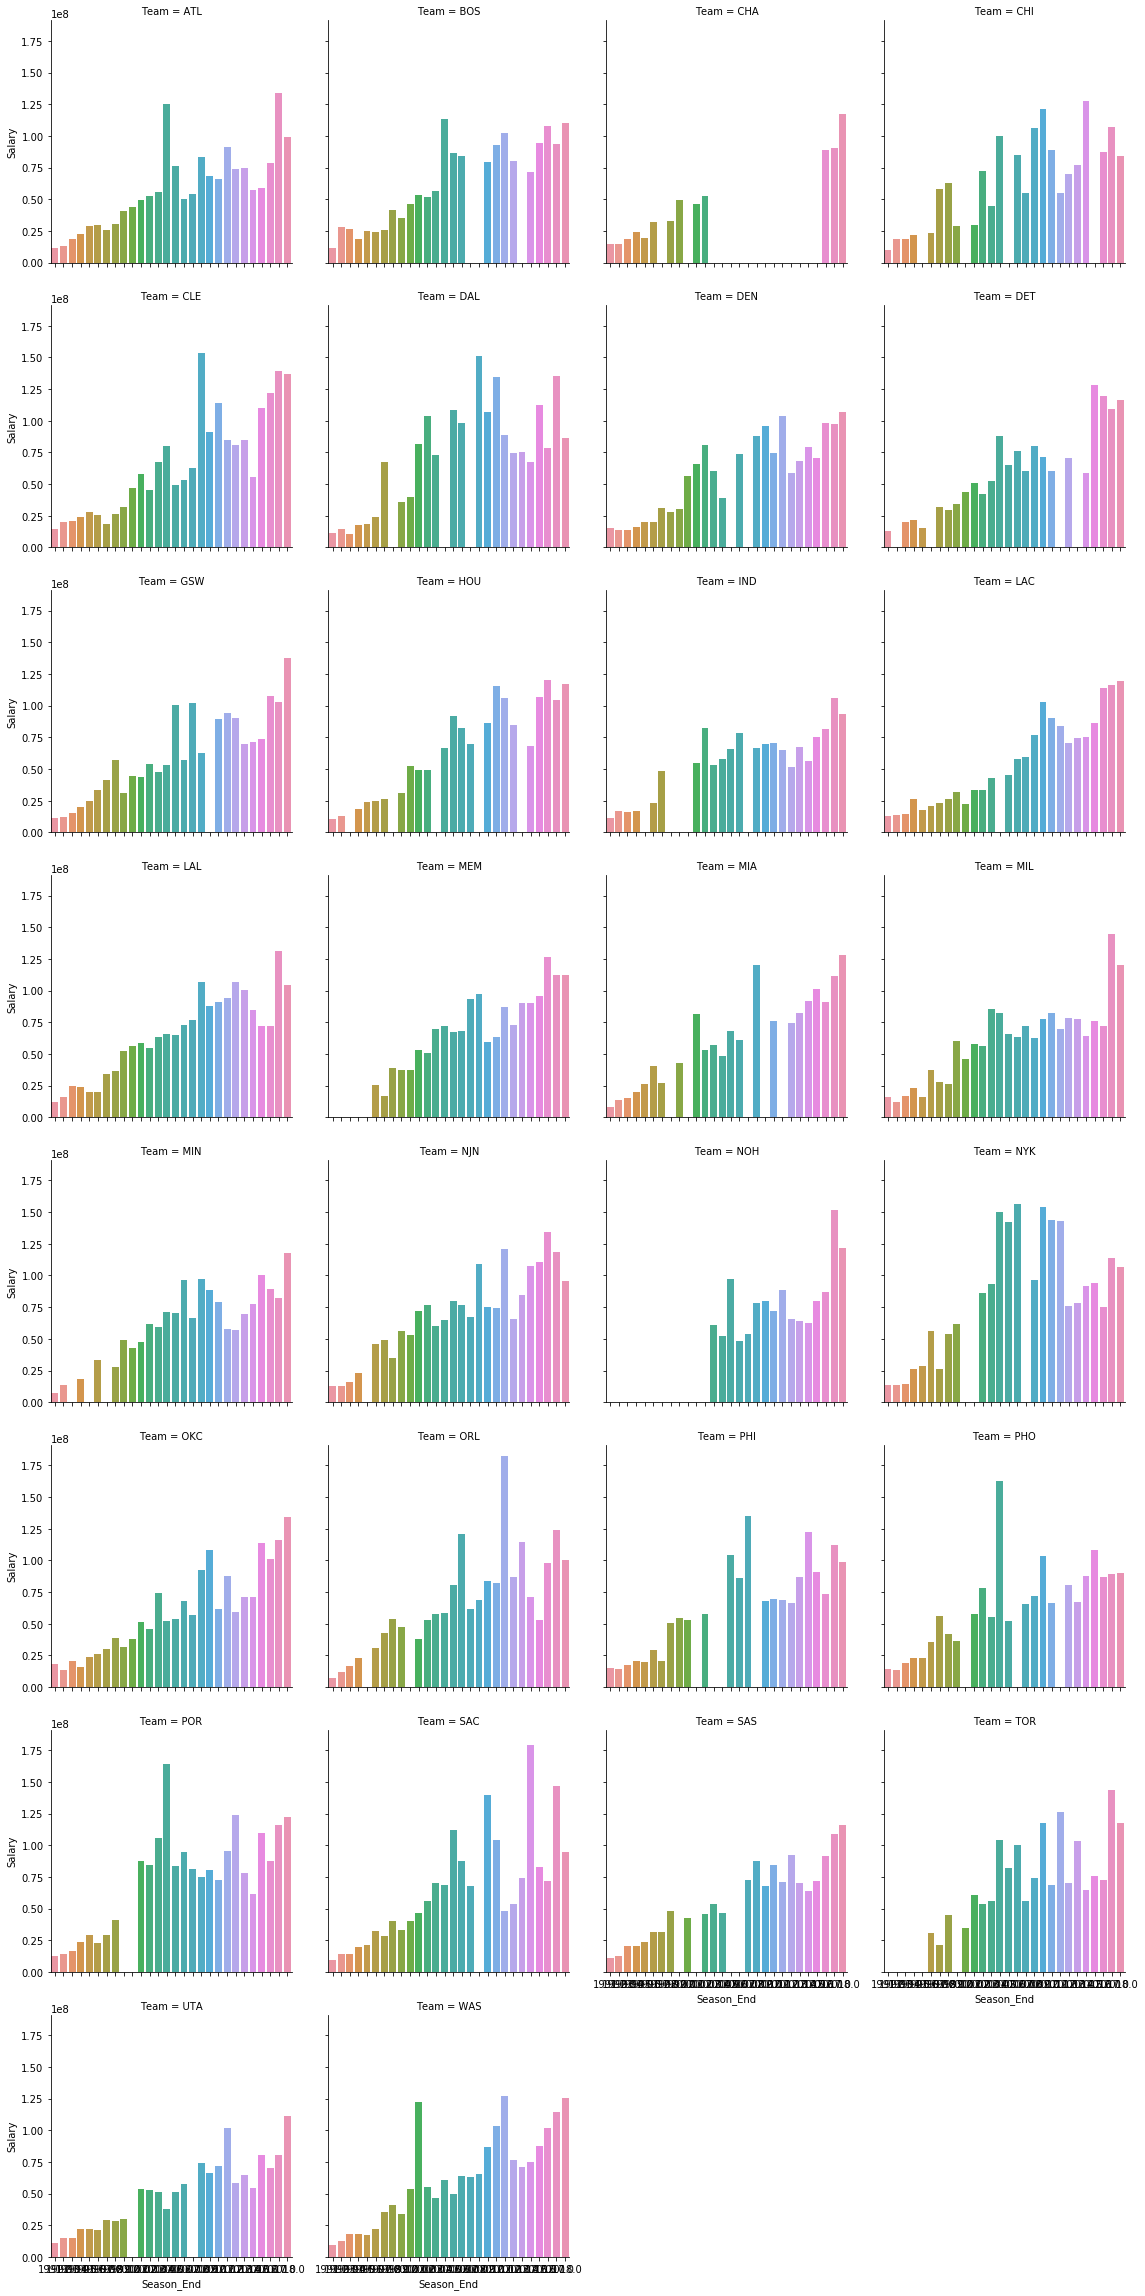

In [110]:
salary_by_year = data.loc[:, ['Team', 'Season_End', 'Salary']].groupby(['Team', 'Season_End']).sum(axis=1)
salary_by_year.reset_index(inplace=True)

sns.factorplot(x='Season_End', y='Salary', col='Team', col_wrap=4, data=salary_by_year, kind='bar');


# Next Steps

- Figure out how to fill in the missing salary values (make the functions work above)
- Start to determine key features for comparing salary versus player impact
- Note, probably going to use win shares instead of the real plus/minus, as I could find a pre-scraped dataset that included that rather than having to scrape through all of ESPN's pages (which I started to do in the 'get data' notebook)
- Add a column to the dataframe that is the player's salary as a % of the team's salary for that year